# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Standard Section 9:  Feed Forward Neural Networks

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner<br/>
**Section Leaders**: Marios Mattheakis, Abhimanyu (Abhi) Vasishth, Robbert (Rob) Struyven<br/>

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

The goal of this section is to be familiar with the most basic Artificial Neural Network architecture the  Feed-Forward Neural Network (FFNN). 

Specifically, we will: 
  
1. Quick review the FFNN *anatomy*.
2. Design a simple FFNN from the scratch and fit simple toy-datasets.
3. Quantify the prediction (fit) by writing a loss function.
4. Write a function for the forward pass through an FFNN with a single hidden layer of arbitrary number of hidden neurons.
4. Use TensorFlow and Keras to design the previous architectures. 
5. Use TensorFlow and Keras to train the network (find the optimal network parameters). 



#### Import packages and check the version of your TensorFlow, it should be the version 2.0.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# from pandas import DataFrame

import tensorflow as tf


In [3]:
print(tf.__version__)

2.0.0


#### IMPORTANT: Unless you have the "TF version 2.0.0"  try the following
```pip install --upgrade pip```

```pip install tensorflow==2.0.0 ```

**OR**

```conda install tensorflow=2.0.0```



---------
## 1. Review of the ANN *anatomy*  

#### Input, Hidden, and Output layers

The **forward** pass through an FFNN  is  a sequence of linear (affine) and nonlinear (activation) operations. 



<img src="../fig/forward.jpg" width="70%"/>


## 2. Design a Feed Forward neural network


Let's create a simple FFNN  with one input,  one linear  neuron as output layer, and one hidden layer of arbitrary number of hidden neurons. Get familiar with the forward propagation.
- Define a nonlinear function which will be used for activation. 
- Create an FFNN with one hidden neuron and get familiar with your activation function.
- Load the toyDataSet_1.csv and try to fit. 
- Quantify the fitting by using a loss function.
- Make a general function for the forward pass of an FFNN with  one hidden layer of arbitrary number of hidden neurons. Always keep one input and one output. The output is a linear layer (affine transformation).
- Load the toyDataSet_1.csv. Design an FFNN with one hidden neurons and fit.
- Load the toyDataSet_2.csv. Design an FFNN with two hidden neurons and fit.

### Define the activation function
Here, we use the *Rectified Linear Unit*  (ReLU) function which is defined as $$g(x)=\max(0,x)$$

In [4]:
def g(z: float) -> float :
    return  np.maximum(0, z)

# or 
# g = lambda z: np.maximum(0, z)

### Build a ANN with one hidden neuron

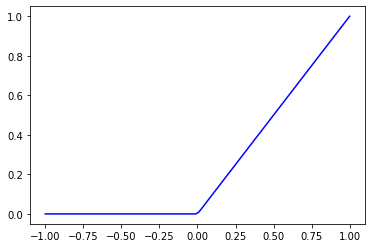

In [5]:
# input vector
x_train = np.linspace(-1,1,100)

# set the network parameters
w1 = 1
b1 = 0.0
w2  = 1
b2  = 0.0 

# affine operation
l1 = w1*x_train + b1

# activation
h = g(l1)

# output linear layer
y_train = w2*h+b2


plt.plot(x_train, y_train,'-b' )

#### Plot a few cases to understand

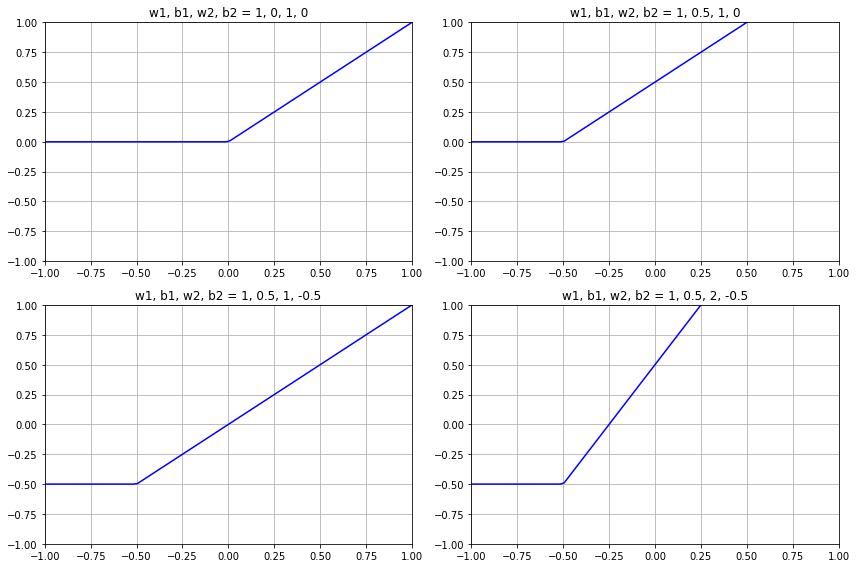

In [6]:
plt.figure(figsize=[12,8])

plt.subplot(2,2,1)
w1,b1,w2,b2 = 1,0,1,0
l1 = w1*x_train + b1
y_train = w2*g(l1)+b2
plt.plot(x_train,y_train,'b')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.title('w1, b1, w2, b2 = '+ str(w1) + ', ' + str(b1)+ ', '+ str(w2) + ', ' + str(b2))
plt.grid('on')
#

plt.subplot(2,2,2)
w1,b1,w2,b2 = 1, 0.5, 1,0
l1 = w1*x_train + b1
y_train = w2*g(l1)+b2
plt.plot(x_train,y_train,'b')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.title('w1, b1, w2, b2 = '+ str(w1) + ', ' + str(b1)+ ', '+ str(w2) + ', ' + str(b2))
plt.grid('on')

#
plt.subplot(2,2,3)
w1,b1,w2,b2 = 1,0.5, 1, -0.5
l1 = w1*x_train + b1
y_train = w2*g(l1)+b2
plt.plot(x_train,y_train,'b')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.title('w1, b1, w2, b2 = '+ str(w1) + ', ' + str(b1)+ ', '+ str(w2) + ', ' + str(b2))
plt.grid('on')

#
plt.subplot(2,2,4)
w1,b1,w2,b2 = 1, 0.5, 2, -.5
l1 = w1*x_train + b1
y_train = w2*g(l1)+b2
plt.plot(x_train,y_train,'b')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.title('w1, b1, w2, b2 = '+ str(w1) + ', ' + str(b1)+ ', '+ str(w2) + ', ' + str(b2))
plt.grid('on')
plt.tight_layout()


#### Exercise: Fit the data
Load the toyDataSet_1.csv from the data directory. Fit the data with the above simple FFNN and plot your results.

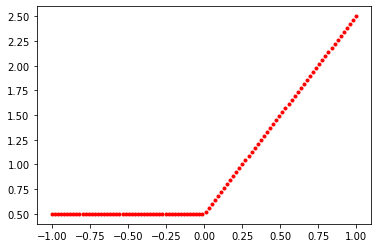

In [33]:
toySet_1 = pd.read_csv('../data/toyDataSet_1.csv')

x_train = toySet_1['x'].values.reshape(-1,1)
y_train = toySet_1['y'].values.reshape(-1,1)

plt.plot(x_train, y_train,'.r',label='data')

In [ ]:
# your code here


# set the network parameters


# write the network operations: affine-activation-affine


In [9]:
# %load 'solutions/sol_1.py'
w1 = 2
b1 = 0.0
w2  = 1
b2  = 0.5

# affine operation
l1 = w1*x_train + b1
# activation
h = g(l1)
# output linear layer
y_model = w2*h + b2


#### Plot the prediction and the ground truth

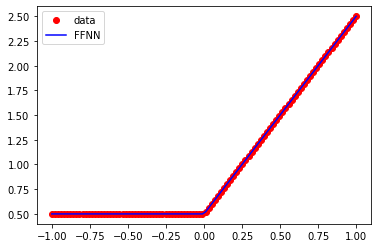

In [10]:
plt.plot(x_train, y_train,'or',label='data')
plt.plot(x_train, y_model,'-b', label='FFNN' )
plt.legend()

#### Write the Loss function
Quantify the quality of the fitting by writing a loss function. Mean Square Error (MSE) is a good choice for regression tasks.

In [11]:
def mseLoss(y_data, y_prediction):    
    return ((y_data - y_prediction)**2).mean()
    

In [12]:
Loss = mseLoss(y_train,y_model)
print('MSE Loss = ', Loss)

MSE Loss =  1.1832913578315177e-32


#### Forward pass function
Write a function for the forward propagation through an FFNN with  one input, one linear output neuron, and one hidden layers with arbitrary number of neurons. 

General Scheme:
- One input vector: $x$
- Affine (linear) transformation with $w_{1},~b_{1}$  are the parameter vectors (or $w_{1i},~b_{1i}$):
$$l_1 = \sum_i^\text{neurons} w_{1i}x+b_{1i} = w^T_1 x + b_1  = w_1 \cdot x + b_1 = W_1\cdot X$$
- Activation (nonlinear transformation): $$h = g(l_1)$$
- Linear Output layer with a vector for weights $w_o$ and a scalar for the bias $b_o$: $$y = w_o^T h+b_o = w_o \cdot h + b_o = W_o\cdot H$$

In [13]:
def myFFNN(X, W1, Wo ):

#     input dimensions  = 1
#     output dimensions = 1
#     hidden layers = 1
#     hidden neurons is determined by the size of W1 or W0
#     W1 : parameters of first layer 
#     Wo : parameters of output layer
#     parameters :  weights and biases


    # Input Layer: 
    # add a constant column for the biases to the input vector X
    ones = np.ones((len(X),1))
    l1 = X
    l1 = np.append(l1, ones, axis=1)

    # hidden layer: Affine and activation
    a1 = np.dot(W1, l1.T)
    h1 = g(a1)    
    
    # Output layer (linear layer) (2 steps)
    # (a) Add a const column the h1 for the affine transformation
    ones = np.ones((len(X),1))    
    
    H= np.append(h1.T, ones,axis=1).T
    # (b) Affine
    a = np.dot(Wo,H)
    y_hat = a.T

    return y_hat

#### Use the previous parameters in our forward propagation function to fit the toyDataSet_1.csv. Poot the resuts and print the associate loss function

MSE Loss =  1.1832913578315177e-32


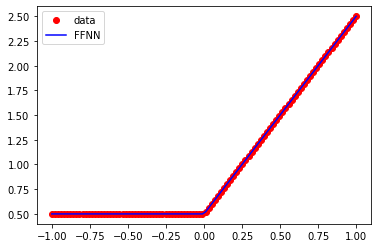

In [22]:
w11 = 2
b11 = 0.0
w21  = 1
b21  = 0.5

# make the parameters matrices
# First layer
W1 = np.array([[w11,b11]])
# Output Layer (only one bias term)
Wo = np.array([[w21,b21]])

# run the model
y_model_1 = myFFNN(x_train, W1, Wo )

# plot the prediction and the ground truth
plt.plot(x_train, y_train,'or',label='data')
plt.plot(x_train, y_model_1,'-b', label='FFNN' )
plt.legend()

# quantify your prediction
Loss_1 = mseLoss(y_train,y_model_1)
print('MSE Loss = ', Loss_1)

#### Exercise: Fit a more complex dataset
Load the toyDataSet_2.csv from the data directory. Fit the data with your FFNN function and plot your results.

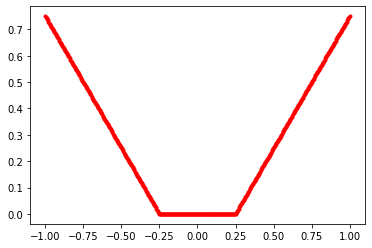

In [35]:
toySet_2 = pd.read_csv('../data/toyDataSet_2.csv')

x_train2 = toySet_2['x'].values.reshape(-1,1)
y_train2 = toySet_2['y'].values.reshape(-1,1)

plt.plot(x_train2, y_train2,'.r',label='data')


#### Find the optimal parameters

In [16]:
## your code here

w11 = 1
b11 = .25

w12 = -1
b12 = .25

w21  = 1
w22  = 1

b2  = -0.5


In [ ]:
# %load 'solutions/sol_2.py'



#### Run the model, plot and quantify the prediction

MSE Loss =  2.1606060127435897e-33


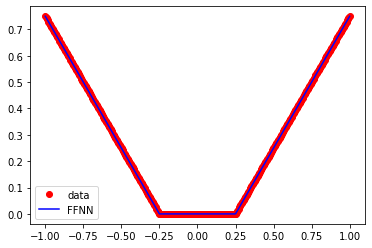

In [17]:
# make the parameters matrices
# First Layer
W1 = np.array([[w11,b11], [w12,b12]])
# Output Layer (only one bias term)
Wo = np.array([[w21,w22, b2]])


# run the model
y_model2 = myFFNN(x_train2, W1, Wo )

# plot the prediction and the ground truth
plt.plot(x_train2, y_train2,'or',label='data')
plt.plot(x_train2, y_model2,'-b', label='FFNN' )
plt.legend()

# quantify your prediction
Loss_2 = mseLoss(y_train2,y_model2)
print('MSE Loss = ', Loss_2)


#### More complicated function
Explore more the functions that this simple network can fit by using more neurons. Essentially explore what function it can generate.

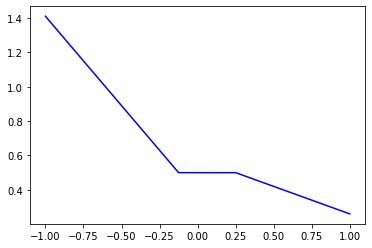

In [18]:
# Two Neurons

w11 = -.8
b11 = -.1

w12 = .4
b12 = -.1

w21  = 1.3
w22  = -.8

b2  = 0.5

# First Layer
W1 = np.array([[w11,b11], [w12,b12]])
# Output Layer (only one bias term)
Wo = np.array([[w21,w22, b2]])


# run the model
y_model_p = myFFNN(x_train2, W1, Wo )

# plot the prediction and the ground truth
plt.plot(x_train2, y_model_p,'b', label='FFNN' )



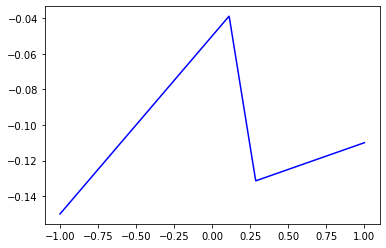

In [19]:
# Three Neurons
w11 = -.1
b11 = .3

w12 = .9
b12 = -.1

w13 = .7
b13 = -.2


w21  = -1.
w22  = -.7
w33  = .8

b2  = 0.25

# First Layer
W1 = np.array([[w11,b11], [w12,b12], [w13,b13]])
# Output Layer (only one bias term)
Wo = np.array([[w21,w22,w33, b2]])


# run the model
y_model_p = myFFNN(x_train2, W1, Wo )

# plot the prediction and the ground truth
plt.plot(x_train2, y_model_p,'b', label='FFNN' )



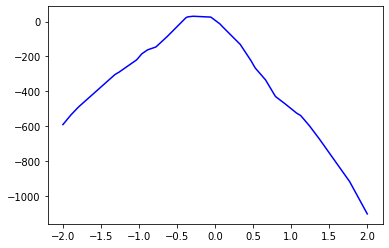

In [20]:
# Random numbers between a,b
# (b-a) * np.random.random_sample((4, 4)) + a
a = -20
b = 20

# N neurons
N = 50

# Create random parameter matrices
W1 = (b-a) * np.random.random_sample((N, 2)) + a
Wo = (b-a) * np.random.random_sample((1, N+1)) + a

# make a bigger interval
x_train_p2 = np.linspace(-2,2,1000)
x_train_p2= x_train_p2.reshape(-1,1)

# run the model
y_model_p2 = myFFNN(x_train_p2, W1, Wo )

# plot the prediction and the ground truth
plt.plot(x_train_p2, y_model_p2,'b', label='FFNN' )



-------------

## 3. Tensor Flow and Keras

**Keras, Sequential:** [Source]
(https://keras.io/models/sequential/)


There are many platforms that create the forward propagation (and not only) through more complex and deep architectures. They also provide the backpropagation function for training a network, that is, to find the optimal parameters for a specific task.

Here, we use Tensor Flow (TF) and Keras to employ FFNN for regression tasks. 
- Use Keras to fit the toyDataSet_2 dataset. Tune the weights manually.
- Use  TF to find the optimal parameters for the same dataset. Train the FFNN by using backpropagation.

#### Import packages from keras

In [36]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

#### Read again the toyDataSet_2 and define again the  weights in solution2

In [44]:
toySet_2 = pd.read_csv('../data/toyDataSet_2.csv')

x_train2 = toySet_2['x'].values.reshape(-1,1)
y_train2 = toySet_2['y'].values.reshape(-1,1)

# plt.plot(x_train2, y_train2,'.r',label='data')


In [38]:
# %load 'solutions/sol_2.py'
w11 = 1
b11 = .25

w12 = -1
b12 = .25

w21  = 1
w22  = 1

b2  = -0.5



#### Using TensorFlow and Keras make a FFNN to fit the toyDataSet_2. Use the same architecture and weights as previously

In [39]:
model = models.Sequential(name='My_two_neurons_model_fixedWeights')

# hidden layer with 2 neurons (or nodes)
model.add(layers.Dense(2, activation='relu', input_shape=(1,)))

# output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

model.summary()


Model: "My_two_neurons_model_fixedWeights"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


#### Manually set the parameters

In [40]:
# get weights 
weights = model.get_weights()
print('Initial values of the parameters')
print(weights)

# hidden layer
weights[0][0]=np.array([ w11, w12]) #weights 
weights[1]=np.array([b11, b12]) # biases
# output layer 
weights[2]=np.array([[w21],[w22]]) # weights
weights[3] = np.array([b2])    # bias

model.set_weights(weights)

print('\nAfter setting the parameters')
print(weights)

Initial values of the parameters
[array([[-0.59771043,  1.2688538 ]], dtype=float32), array([0., 0.], dtype=float32), array([[-0.25285745],
       [ 1.2993709 ]], dtype=float32), array([0.], dtype=float32)]

After setting the parameters
[array([[ 1., -1.]], dtype=float32), array([0.25, 0.25]), array([[1],
       [1]]), array([-0.5])]


#### Visualize and quantify the prediction

MSE Loss =  6.818940528834373e-16


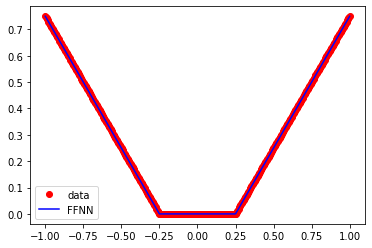

In [41]:
y_model_tf1 = model.predict(x_train2)

# plot the prediction and the ground truth
plt.plot(x_train2, y_train2,'or',label='data')
plt.plot(x_train2, y_model_tf1,'-b', label='FFNN' )
plt.legend()

# quantify your prediction
Loss_tf1 = mseLoss(y_train2, y_model_tf1)
print('MSE Loss = ', Loss_tf1)

### Train the network
#### Let TensorFlow to find the optimal weights

#### Back propagation

The **backward** pass is the training. It is based on chain rule and updates the parameters. The optimization is done by minimizing the loss function.

<img src="../fig/dl.jpg" width="70%"/>

#### Baching, stochastic gradient descent, and epochs
Shufle and split the entire dataset in mini-batches help to escape from local minima

<img src="../fig/batching.jpg" width="70%"/>



In [ ]:
model_t = models.Sequential(name='My_two_neurons_model_training')

# hidden layer with 2 neurons (or nodes)
model_t.add(layers.Dense(2, activation='relu', input_shape=(1,)))

# output layer, one neuron 
model_t.add(layers.Dense(1,  activation='linear'))

# model_t.summary()

In [ ]:
sgd = optimizers.SGD(lr=0.01)
model_t.compile(loss='MSE',optimizer=sgd) 
history = model_t.fit(x_train2, y_train2, epochs=100, batch_size=16, verbose=0)

#### Plot training & validation loss values

In [ ]:
plt.plot(history.history['loss'],'b')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')


#### Visualize the prediction

In [ ]:
y_model_t = model_t.predict(x_train2)

# plot the prediction and the ground truth
plt.plot(x_train2, y_train2,'.r',label='data')
plt.plot(x_train2, y_model_t,'b', label='FFNN' )
plt.legend()

# quantify your prediction
Loss_t = mseLoss(y_train2, y_model_t)
print('MSE Loss = ', Loss_t)


#### Check the parameters

In [ ]:
weights_t = model_t.get_weights()

print("TF weights:\n", weights_t)
print()
print("my weights:\n", weights)

#### Add more neurons and also take a look during the training

In [ ]:
model = models.Sequential(name='My_two_neurons_model_training')
# hidden layer with 2 neurons (or nodes)
model.add(layers.Dense(10, activation='relu', input_shape=(1,)))
# output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

sgd = optimizers.SGD(lr=0.01)
model.compile(loss='MSE',optimizer=sgd) 

def plotting(model_t, ax, title):
    y_model_t = model_t.predict(x_train2)
    # quantify your prediction
    # plot the prediction and the ground truth
    ax.plot(x_train2, y_train2,'.r',label='data')
    ax.plot(x_train2, y_model_t,'b', label='FFNN' )
    ax.legend()
    loss = mseLoss(y_train2, y_model_t)
    ax.set_title(title + ' - MSE Loss = ' + str(np.round(loss,5)))

f, ax = plt.subplots(2,3, figsize=(16,7.5))
ax = ax.ravel()
plotting(model, ax[0], 'Epoch 0')
for i in range(5):
    model.fit(x_train2, y_train2, epochs=100, batch_size=32, verbose=0)
    plotting(model, ax[i+1], 'Epoch '+str(100*(i+1)))

In [ ]:
model.summary()

### Let's fit something very nonlinear 

In [49]:
toySet_3 = pd.read_csv('../data/toyDataSet_3.csv')

x_train3 = toySet_3['x'].values.reshape(-1,1)
y_train3 = toySet_3['y'].values.reshape(-1,1)


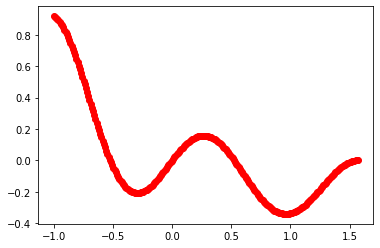

In [46]:
plt.plot(x_train3, y_train3,'or')

Desing now a FFNN with two-hidden layers with *tanh* activation function

In [ ]:
model = models.Sequential(name='MyNet')

# hidden layer with 20 neurons (or nodes)
model.add(layers.Dense(20, activation='tanh', input_shape=(1,)))
# Add another hidden layer of 20 neurons
# hidden layer with 20 neurons (or nodes)
model.add(layers.Dense(20, activation='tanh'))
# output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

# model.summary()

In [ ]:
sgd = optimizers.SGD(lr=0.02)
model.compile(loss='MSE',optimizer=sgd) 
history = model.fit(x_train3, y_train3, epochs=1000, batch_size=16, verbose=0)

In [ ]:
# Log-scale is helpful since the loss decays fast
plt.loglog(history.history['loss'],'b')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')


In [ ]:
y_model = model.predict(x_train3)

# plot the prediction and the ground truth
plt.plot(x_train3, y_train3,'.r',label='data')
plt.plot(x_train3, y_model,'b', label='FFNN' )
plt.legend()

# quantify your prediction
Loss_t = mseLoss(y_train3, y_model)
print('MSE Loss = ', Loss_t)



----------




## End of Section

----------

## Info for the Tensor Flow 2 and Keras

#### Instructions for running `tf.keras` with Tensorflow 2.0:  

1. Create a `conda` virtual environment by cloning an existing one that you know works
```
conda create --name myclone --clone myenv
```

2. Go to [https://www.tensorflow.org/install/pip](https://www.tensorflow.org/install/pip]) and follow instructions for your machine.

All references to Keras should be written as `tf.keras`.  For example: 

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
tf.keras.models.Sequential
tf.keras.layers.Dense, tf.keras.layers.Activation, 
tf.keras.layers.Dropout, tf.keras.layers.Flatten, tf.keras.layers.Reshape
tf.keras.optimizers.SGD
tf.keras.preprocessing.image.ImageDataGenerator
tf.keras.regularizers
tf.keras.datasets.mnist   
```

You could avoid the long names by using
```
from tensorflow import keras
from tensorflow.keras import layers
```
These imports do not work on some systems, however, because they pick up previous versions of `keras` and `tensorflow`. That is why I avoid them in this lab.